In [6]:
!pip install pywavelet
!pip install matplotlib
!pip install opencv-python
!pip install scikit-image

  Obtaining dependency information for pywavelet from https://files.pythonhosted.org/packages/90/dd/5fe9f991b05c25717ae3d98999dc4d2f408c1db2968dea77d8766e367e35/pywavelet-0.0.1b0-py3-none-any.whl.metadata
  Obtaining dependency information for loguru from https://files.pythonhosted.org/packages/03/0a/4f6fed21aa246c6b49b561ca55facacc2a44b87d65b8b92362a8e99ba202/loguru-0.7.2-py3-none-any.whl.metadata
  Obtaining dependency information for bilby from https://files.pythonhosted.org/packages/22/2b/f66e9855670b586f91dce03260bef9da103fa35c38297b3f593706a6e1ba/bilby-2.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for bilby.cython>=0.3.0 from https://files.pythonhosted.org/packages/24/1f/f3a0d155132d0a6c03c9c2bdc5c2d021815ee8a44075e40aca8ce028205a/bilby.cython-0.4.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for dynesty>=2.0.1 from https://files.pythonhosted.org/packages/09/dd/6bfc884c302715f01af13267112ec5e22a4826e244f314a591ee8f731b17/dynesty-2.1.


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Hemath Gaddey\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Hemath Gaddey\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


^C



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Hemath Gaddey\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import pywt
import pywt.data

In [18]:
def display_img(img,title='untitled'):
    if(img.dtype != np.uint8):
        img = cv2.normalize(img, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1) # To convert floating type images to uint8
    cv2.imshow(title,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print('done')

In [19]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def display_img(img, title='untitled'):
    if img.dtype != np.uint8:
        img = cv2.normalize(img, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8UC1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()
    print('done')

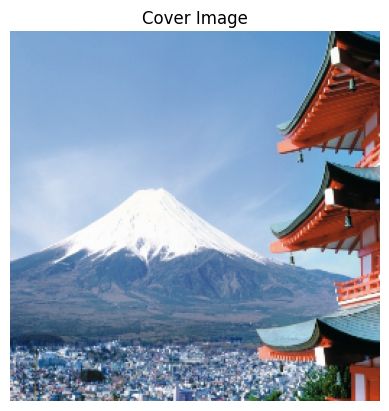

done


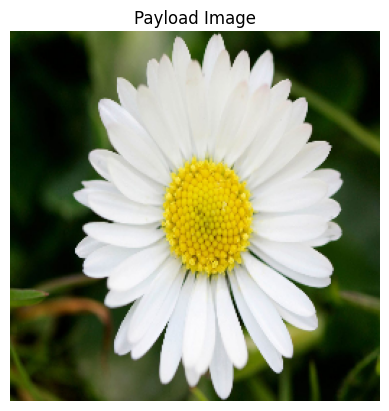

done


In [23]:
cover_img = cv2.resize(cv2.imread('japan.jpg'), (256,256))
payload_img = cv2.resize(cv2.imread('flower.jpg'), (256,256))
display_img(cover_img,'Cover Image')
display_img(payload_img,'Payload Image')

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
 # Replace with the path to your image
def plt_rbg(cover_img):
    # Scale the pixel values to the valid range for the image type
    cover_img_scaled = cv2.normalize(cover_img, None, 0, 255, cv2.NORM_MINMAX)

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(cover_img_scaled.astype(np.uint8), cv2.COLOR_BGR2RGB)

    # Separate the channels
    red_channel = image_rgb[:, :, 0]
    green_channel = image_rgb[:, :, 1]
    blue_channel = image_rgb[:, :, 2]

    # Plot histograms
    plt.figure(figsize=(12, 6))

    # Red channel histogram
    plt.subplot(131)
    plt.hist(red_channel.flatten(), bins=256, color='red', alpha=0.7)
    plt.title('Red Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Green channel histogram
    plt.subplot(132)
    plt.hist(green_channel.flatten(), bins=256, color='green', alpha=0.7)
    plt.title('Green Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Blue channel histogram
    plt.subplot(133)
    plt.hist(blue_channel.flatten(), bins=256, color='blue', alpha=0.7)
    plt.title('Blue Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# HCSSD Encoder and Decoder

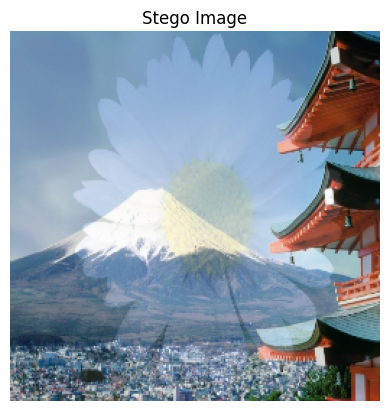

done
Histogram of stego image


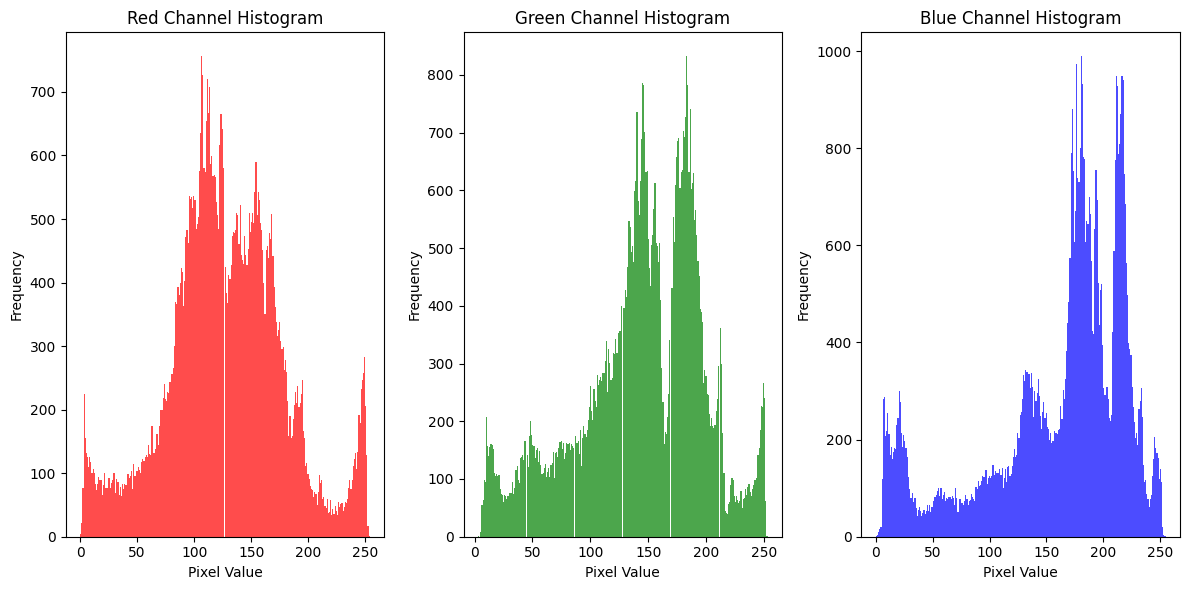

Histogram of cover image


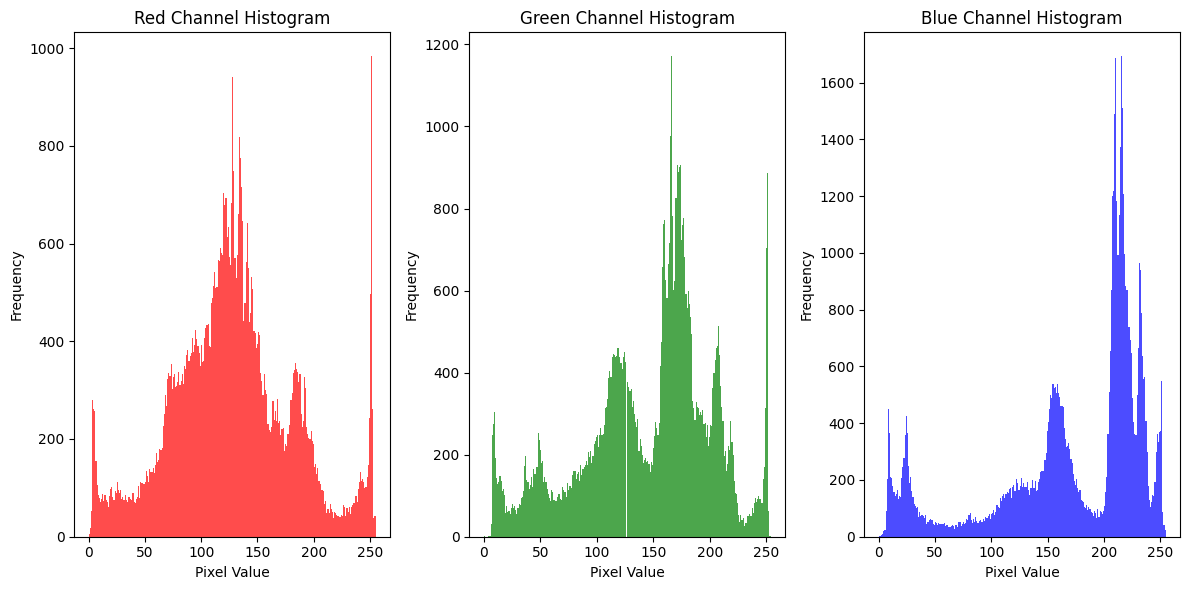

Histogram of payload image


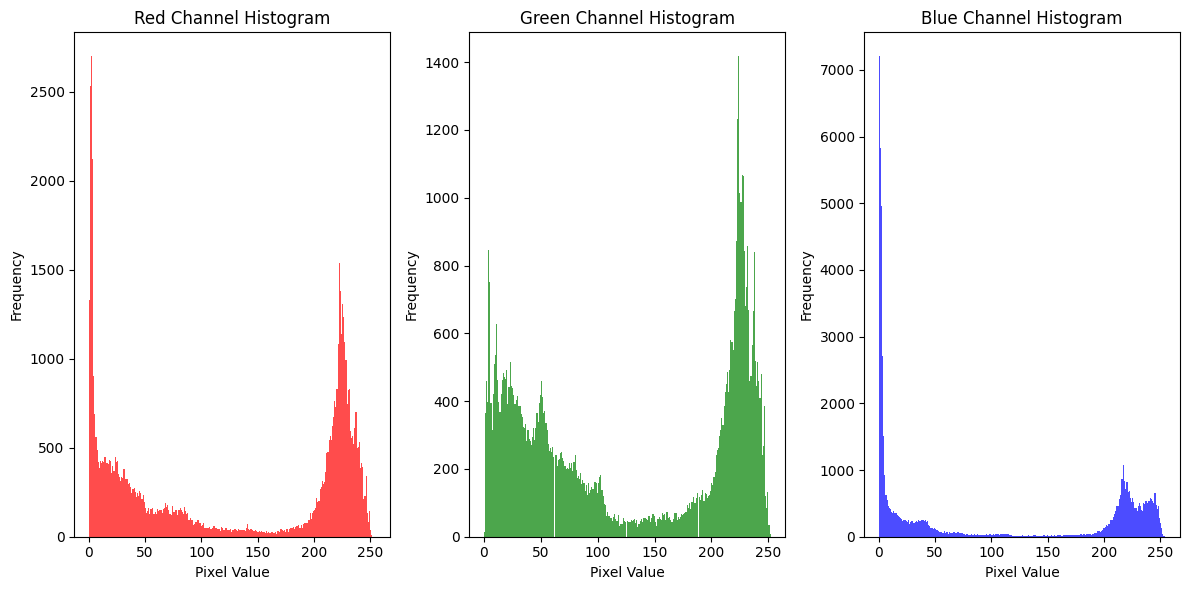

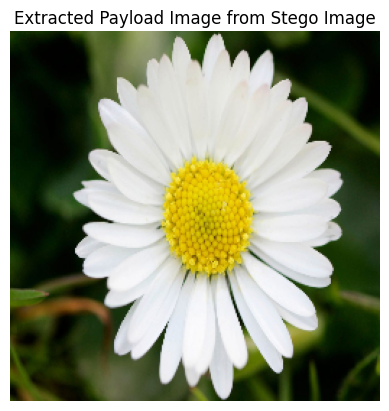

done


In [36]:
wavelet = 'haar'

##
############ HCSSD ENCODER
##
## Cover Image Pre-processing

# Convert to Floating Type
cover_imgf = cover_img.astype(np.float64)

# Separate RGB Components
separated_components = cv2.split(cover_imgf)
separated_components_c = separated_components

# Normalize RGB Components
normalized_components = []
for i in range(3):
    normalized_components.append(separated_components[i]/255)
    #normalized_components.append(separated_components[i]/np.max(separated_components[i]))

# DWT on Each Normalized Component
frequency_components_cover = []
for i in range(3):
    frequency_components_cover.append(pywt.dwt2(normalized_components[i], wavelet))

## Payload Image Pre-processing

# Convert to Floating Type
payload_imgf = payload_img.astype(np.float64)

# Separate RGB Components
separated_components = cv2.split(payload_imgf)

# Normalize RGB Components
normalized_components = []
for i in range(3):
    normalized_components.append(separated_components[i]/255)
    #normalized_components.append(separated_components[i]/np.max(separated_components[i]))

# DWT on Each Normalized Component
frequency_components_payload = []
for i in range(3):
    frequency_components_payload.append(pywt.dwt2(normalized_components[i], wavelet))

a = 0.2
frequency_fused_components = []
cc = frequency_components_cover
cp = frequency_components_payload
cs = []
for i in range(3):
    # Fusion process using weighted combination of coefficients
    cA_fused = cc[i][0] + a * (cp[i][0])
    cH_fused = cc[i][1][0] + a * (cp[i][1][0])
    cV_fused = cc[i][1][1] + a * (cp[i][1][1])
    cD_fused = cc[i][1][2] + a * (cp[i][1][2])

    # Append the tuple of approximation and details coefficients
    cs.append((cA_fused, (cH_fused, cV_fused, cD_fused)))
    
# Perform inverse DWT
fused_image_components = []
for i in range(3):
    fused_image_components.append(pywt.idwt2(cs[i], wavelet))

stego_img = cv2.merge((
    (fused_image_components[0] * np.max(separated_components_c[0])),
    (fused_image_components[1] * np.max(separated_components_c[1])),
    (fused_image_components[2] * np.max(separated_components_c[2]))
))

stego_img = cv2.merge((
    (fused_image_components[0] * 255),
    (fused_image_components[1] * 255),
    (fused_image_components[2] * 255),
))

display_img(stego_img, "Stego Image")
print('Histogram of stego image')
plt_rbg(stego_img)
print('Histogram of cover image')
plt_rbg(cover_img)
print('Histogram of payload image')
plt_rbg(payload_img)

##
############ HCSSD DECODER
##
# Separate RGB components for cover image
cover_components = cv2.split(cover_img)

# Separate RGB components for stego image
stego_components = cv2.split(stego_img)
separated_components = stego_components
    
# Normalize components for cover image
normalized_cover_components = [comp / 255 for comp in cover_components]
#normalized_cover_components = [comp / np.max(comp) for comp in cover_components]

# Normalize components for stego image
normalized_stego_components = [comp / 255 for comp in stego_components]
#normalized_stego_components = [comp / np.max(comp) for comp in stego_components]

# Compute 2D DWT of RGB components for cover image using Haar Wavelet
dwt_cover_components = [pywt.dwt2(comp, wavelet) for comp in normalized_cover_components]

# Compute 2D DWT of RGB components for stego image using Haar Wavelet
dwt_stego_components = [pywt.dwt2(comp, wavelet) for comp in normalized_stego_components]

## Normalize DWT COMPONENTS!
# for i in range(3):
#     dwt_cover_components[i] = list(dwt_cover_components[i])
#     dwt_cover_components[i][1] = list(dwt_cover_components[i][1])
    
#     dwt_stego_components[i] = list(dwt_stego_components[i])
#     dwt_stego_components[i][1] = list(dwt_stego_components[i][1])
    
# for i in range(3):
#     dwt_cover_components[i][0] = dwt_cover_components[i][0]/np.max(dwt_cover_components[i][0])
#     dwt_cover_components[i][1][0] = dwt_cover_components[i][1][0]/np.max(dwt_cover_components[i][1][0])
#     dwt_cover_components[i][1][1] = dwt_cover_components[i][1][1]/np.max(dwt_cover_components[i][1][1])
#     dwt_cover_components[i][1][2] = dwt_cover_components[i][1][2]/np.max(dwt_cover_components[i][1][2])

#     dwt_stego_components[i][0] = dwt_stego_components[i][0]/np.max(dwt_stego_components[i][0])
#     dwt_stego_components[i][1][0] = dwt_stego_components[i][1][0]/np.max(dwt_stego_components[i][1][0])
#     dwt_stego_components[i][1][1] = dwt_stego_components[i][1][1]/np.max(dwt_stego_components[i][1][1])
#     dwt_stego_components[i][1][2] = dwt_stego_components[i][1][2]/np.max(dwt_stego_components[i][1][2])
    

# Subtract DWT coefficients of stego and cover images
subtracted_components = []
b = 1
for i in range(3):
    sub_coeff = (
        b*dwt_stego_components[i][0] - dwt_cover_components[i][0],
        (
            b*dwt_stego_components[i][1][0] - dwt_cover_components[i][1][0],
            b*dwt_stego_components[i][1][1] - dwt_cover_components[i][1][1],
            b*dwt_stego_components[i][1][2] - dwt_cover_components[i][1][2]
        )
    )
    subtracted_components.append(sub_coeff)

# Compute IDWT of subtracted components
idwt_subtracted_components = [pywt.idwt2(comp, wavelet) for comp in subtracted_components]

# Combine the components to form the fused color image
fused_image = cv2.merge((
    (idwt_subtracted_components[0]),
    (idwt_subtracted_components[1]),
    (idwt_subtracted_components[2])
))
# Display or use fused_image as needed
display_img(fused_image, "Extracted Payload Image from Stego Image")

# Metrics

In [30]:
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim

class Metrics:
    def __init__(self):
        pass
    
    def mse(self, img1, img2):
        """
        Mean Squared Error (MSE) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            MSE value.
        """
        return np.mean((img1 - img2) ** 2)

    def snr(self, img1, img2):
        """
        Signal-to-Noise Ratio (SNR) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            SNR value.
        """
        signal = np.sum(img1 ** 2)
        noise = np.sum((img1 - img2) ** 2)
        return 10 * np.log10(signal / noise)

    def psnr(self, img1, img2):
        """
        Peak Signal-to-Noise Ratio (PSNR) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            PSNR value.
        """
        mse = self.mse(img1, img2)
        max_pixel = np.max(img1)
        return 20 * np.log10(max_pixel / np.sqrt(mse))

    def nvf(self, img1, img2):
        """
        Normalized Vertical Fingerprint (NVF) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            NVF value.
        """
        # Compute NVF using vertical fingerprint approach
        v_fingerprint1 = np.mean(np.abs(np.diff(img1, axis=0)))
        v_fingerprint2 = np.mean(np.abs(np.diff(img2, axis=0)))
        return v_fingerprint2 / v_fingerprint1

    def wpsnr(self, img1, img2):
        """
        Weighted Peak Signal-to-Noise Ratio (WPSNR) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            WPSNR value.
        """
        # Assuming weights based on image intensity (you can customize this)
        weights = np.abs(img1) + 1e-8  # Add a small value to avoid division by zero

        mse = np.sum(weights * (img1 - img2) ** 2) / np.sum(weights)
        max_pixel = np.max(img1)
        return 20 * np.log10(max_pixel / np.sqrt(mse))



    def ssim(self, img1, img2):
        """
        Structural Similarity Index (SSIM) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            SSIM value.
        """
        k1 = 0.01
        k2 = 0.03
        L = img1.max() - img1.min()

        # Calculate averages and covariances
        avg_x = np.mean(img1)
        avg_y = np.mean(img2)
        cov_xy = np.cov(img1.flatten(), img2.flatten())[0, 1]

        # Constants for stability
        c1 = (k1 * L) ** 2
        c2 = (k2 * L) ** 2

        # Calculate SSIM
        numerator = (2 * avg_x * avg_y + c1) * (2 * cov_xy + c2)
        denominator = (avg_x ** 2 + avg_y ** 2 + c1) * (np.var(img1) + np.var(img2) + c2)

        ssim_value = numerator / denominator

        return ssim_value  # Example usage:
# metrics = Metrics()
# ssim_value = metrics.ssim(img1, img2)


In [31]:
metrics = Metrics()

In [32]:
# Calculate and print metrics for cover_img and stego_img
mse_cover_stego = metrics.mse(cover_img, stego_img)
snr_cover_stego = metrics.snr(cover_img, stego_img)
psnr_cover_stego = metrics.psnr(cover_img, stego_img)
nvf_cover_stego = metrics.nvf(cover_img, stego_img)
wpsnr_cover_stego = metrics.wpsnr(cover_img, stego_img)
ssim_cover_stego = metrics.ssim(cover_img, stego_img) 

print("Metrics for Cover and Stego Images:")
print("MSE:", mse_cover_stego)
print("SNR:", snr_cover_stego)
print("PSNR:", psnr_cover_stego)
print("NVF:", nvf_cover_stego)
print("WPSNR:", wpsnr_cover_stego)
print("SSIM:", ssim_cover_stego)  # Add this line


Metrics for Cover and Stego Images:
MSE: 946.3851295979842
SNR: -9.5561432323102
PSNR: 18.370124531959195
NVF: 0.1102628152215342
WPSNR: 18.08117285182611
SSIM: 0.9442470712966249


# End of our code

# Extra Code:

In [ ]:
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim

class Metrics:
    def __init__(self):
        pass
    
    def mse(self, img1, img2):
        """
        Mean Squared Error (MSE) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            MSE value.
        """
        return np.mean((img1 - img2) ** 2)

    def snr(self, img1, img2):
        """
        Signal-to-Noise Ratio (SNR) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            SNR value.
        """
        signal = np.sum(img1 ** 2)
        noise = np.sum((img1 - img2) ** 2)
        return 10 * np.log10(signal / noise)

    def psnr(self, img1, img2):
        """
        Peak Signal-to-Noise Ratio (PSNR) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            PSNR value.
        """
        mse = self.mse(img1, img2)
        max_pixel = np.max(img1)
        return 20 * np.log10(max_pixel / np.sqrt(mse))

    def nvf(self, img1, img2):
        """
        Normalized Vertical Fingerprint (NVF) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            NVF value.
        """
        # Compute NVF using vertical fingerprint approach
        v_fingerprint1 = np.mean(np.abs(np.diff(img1, axis=0)))
        v_fingerprint2 = np.mean(np.abs(np.diff(img2, axis=0)))
        return v_fingerprint2 / v_fingerprint1

    def wpsnr(self, img1, img2):
        """
        Weighted Peak Signal-to-Noise Ratio (WPSNR) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            WPSNR value.
        """
        # Assuming weights based on image intensity (you can customize this)
        weights = np.abs(img1) + 1e-8  # Add a small value to avoid division by zero

        mse = np.sum(weights * (img1 - img2) ** 2) / np.sum(weights)
        max_pixel = np.max(img1)
        return 20 * np.log10(max_pixel / np.sqrt(mse))

    def ssim(self, img1, img2):
        """
        Structural Similarity Index (SSIM) metric.

        Parameters
        ----------
        img1 : ndarray
            First image.
        img2 : ndarray
            Second image.

        Returns
        -------
        float
            SSIM value.
        """
        return compare_ssim(img1, img2, data_range=img2.max() - img2.min(), multichannel=True)

# Example usage:
# metrics = Metrics()
# ssim_value = metrics.ssim(img1, img2)


ModuleNotFoundError: No module named 'skimage'

In [ ]:
coeff = pywt.dwt2(payload_img, 'haar')
coeff = pywt.dwt2(payload_img, 'haar')
x = 101010101
img = pywt.idwt2((x*coeff[0],(x*coeff[1][0],x*coeff[1][1],x*coeff[1][2])), 'haar')
print(np.min(img),np.max(img))
display_img(img)

-2.2351741790771484e-08 25454545452.000008
done


In [ ]:
cover_img = cv2.cvtColor(cv2.resize(cv2.imread('japan.jpg'), (256,256)), cv2.COLOR_BGR2GRAY)
payload_img = cv2.cvtColor(cv2.resize(cv2.imread('flower.jpg'), (256,256)), cv2.COLOR_BGR2GRAY)

In [ ]:
cover_img_f = pywt.dwt2(cover_img/255, 'haar')
payload_img_f = pywt.dwt2(payload_img/255, 'haar')

a = 0.01
stego_img_f = (cover_img_f[0]+a*payload_img_f[0],(cover_img_f[1][0]+a*payload_img_f[1][0],cover_img_f[1][1]+a*payload_img_f[1][1],cover_img_f[1][2]+a*payload_img_f[1][2]))

stego_img = pywt.idwt2(stego_img_f,'haar')
print((stego_img.dtype))
display_img(stego_img)

AttributeError: 'tuple' object has no attribute 'dtype'

In [ ]:
a = 1
extracted_cover_img_f = (stego_img_f[0]-a*cover_img_f[0], (stego_img_f[1][0]-a*cover_img_f[1][0],stego_img_f[1][1]-a*cover_img_f[1][1],stego_img_f[1][2]-a*cover_img_f[1][2]))
#print(np.shape(extracted_cover_img_f))
extracted_cover_img = pywt.idwt2(extracted_cover_img_f, 'haar')
display_img(extracted_cover_img)

done


/home/hemanthgaddey/Documents/venv_fl/fl_venv/lib/python3.11/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 26 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/tmp/ipykernel_7019/3172251074.py:33: RuntimeWarning: invalid value encountered in cast
  plt.imshow(cv2.cvtColor(np.uint8(reconstructed_image), cv2.COLOR_BGR2RGB))


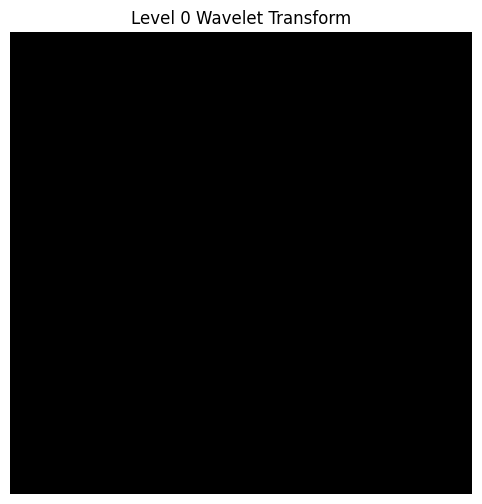

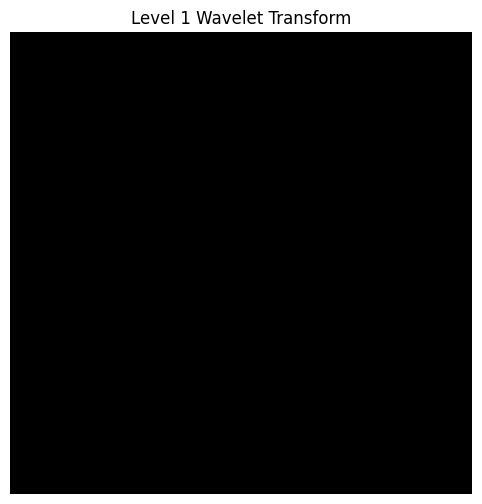

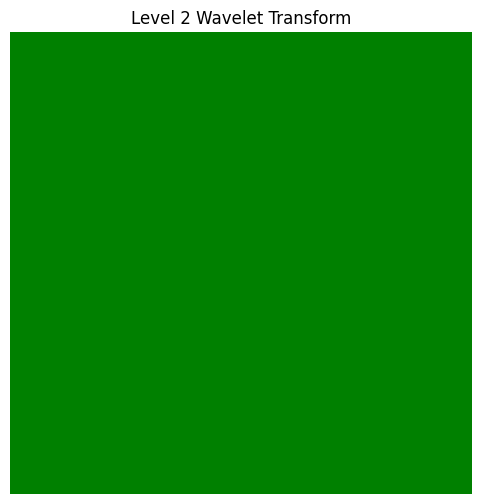

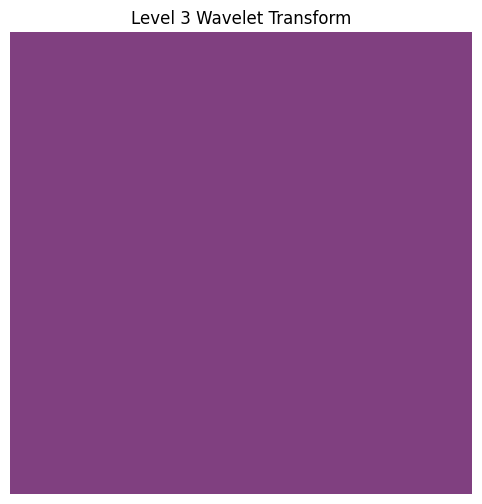

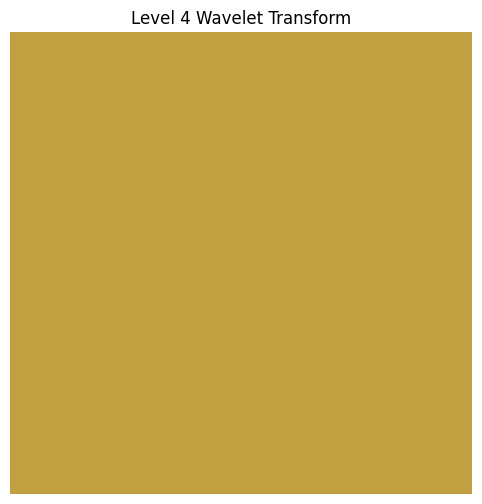

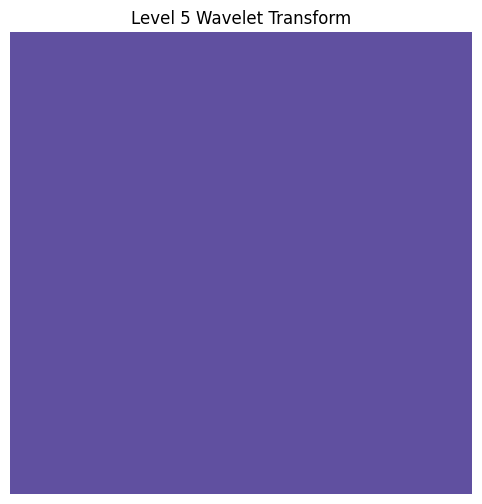

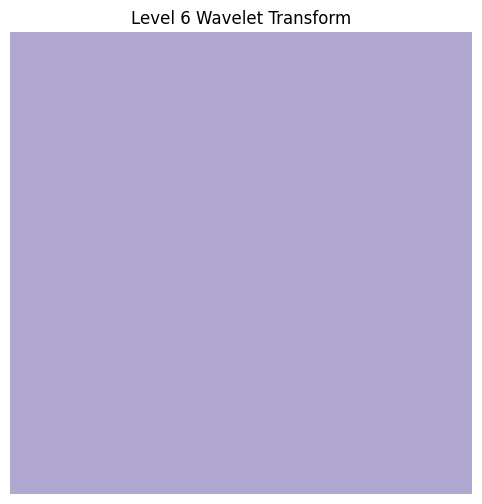

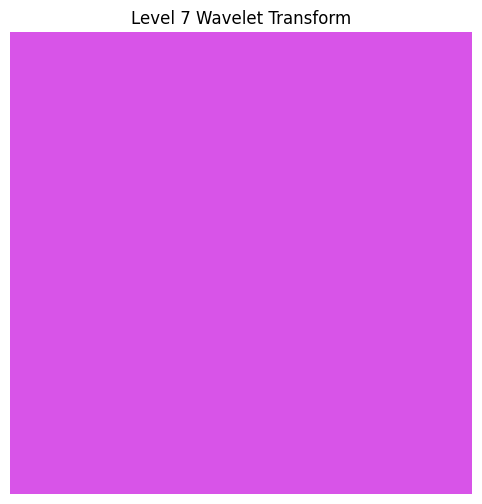

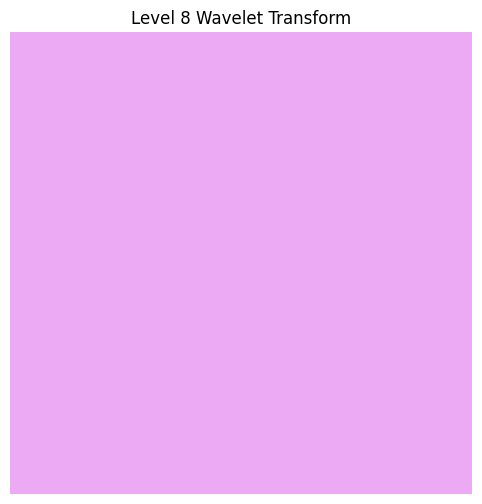

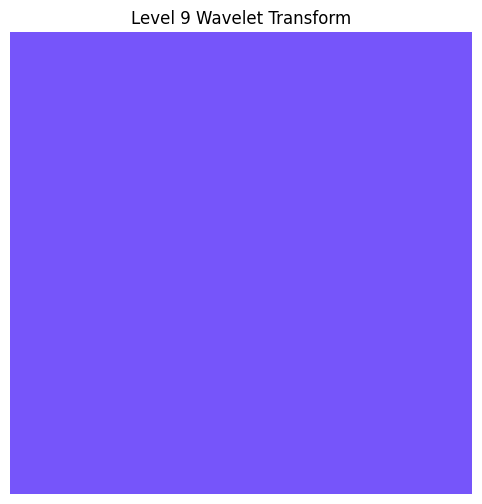

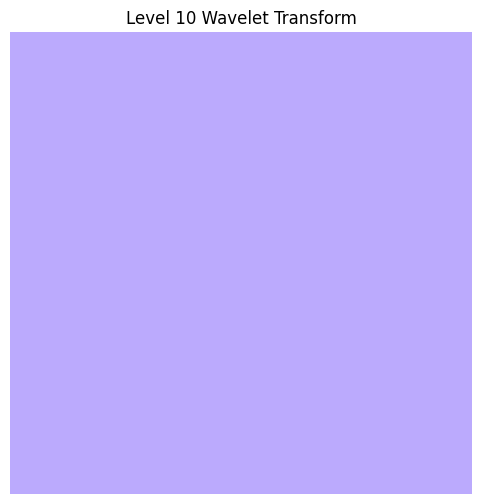

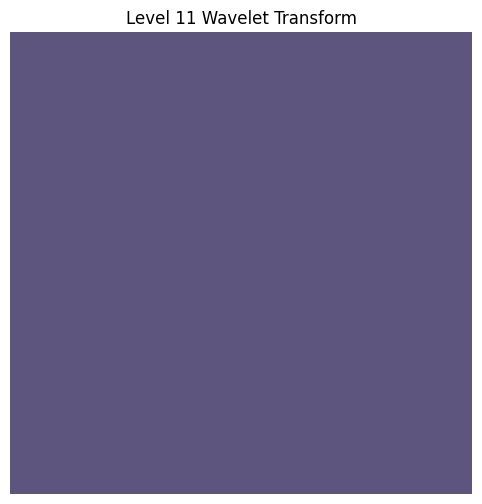

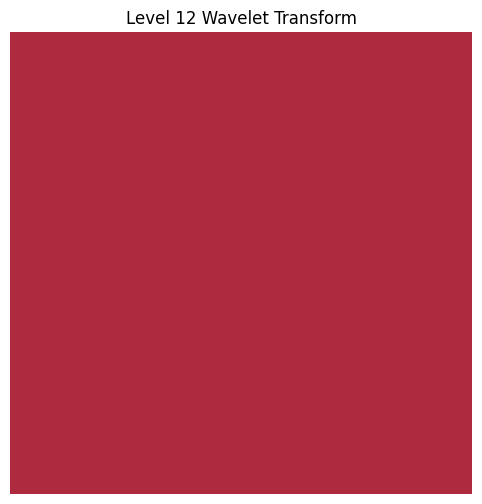

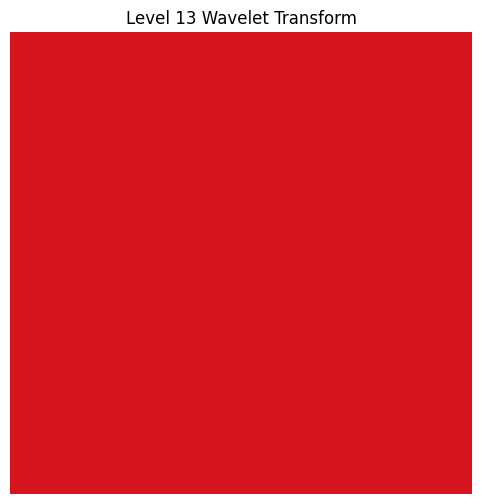

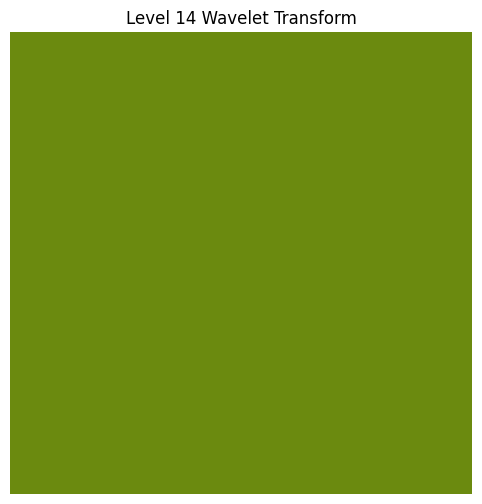

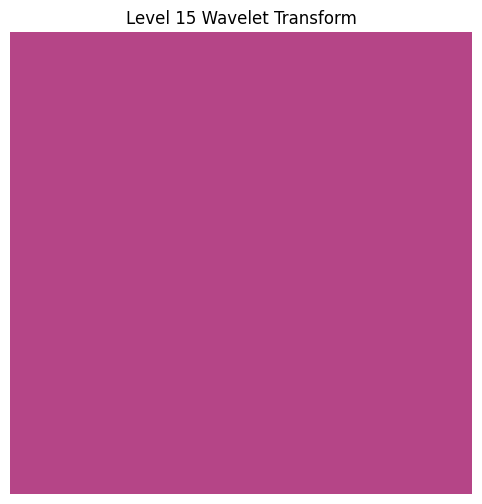

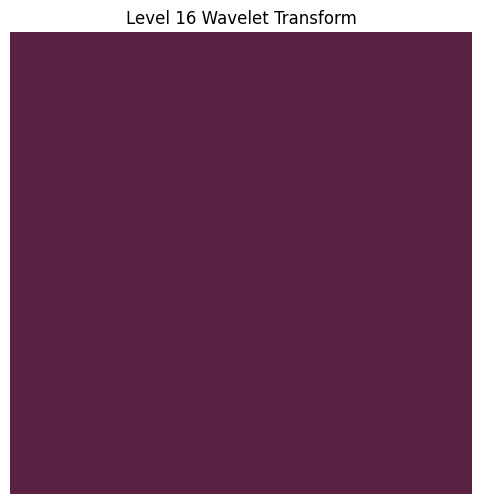

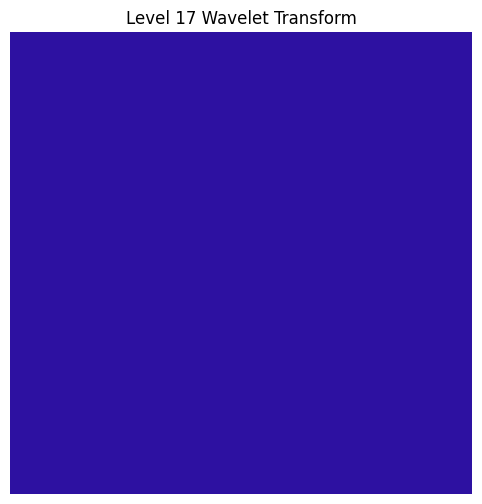

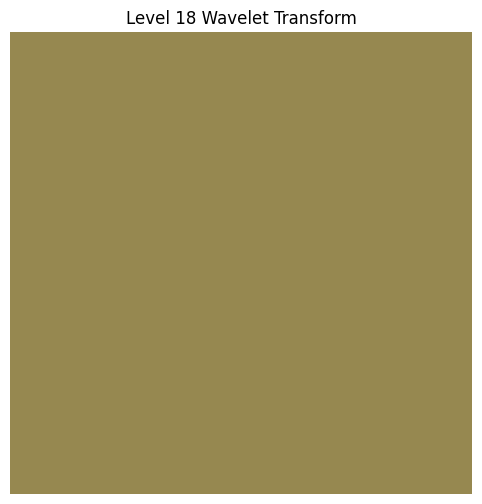

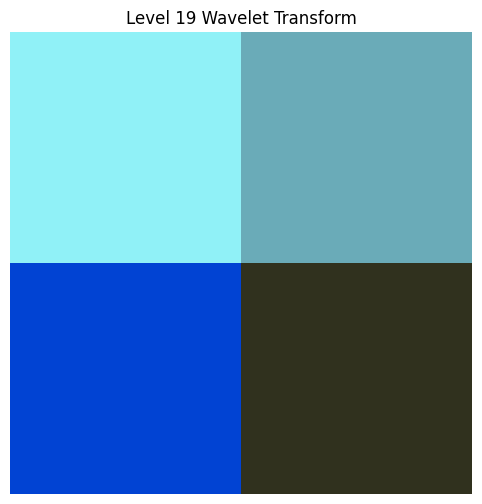

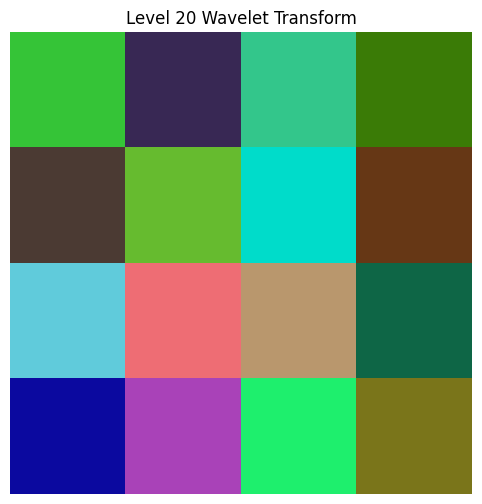

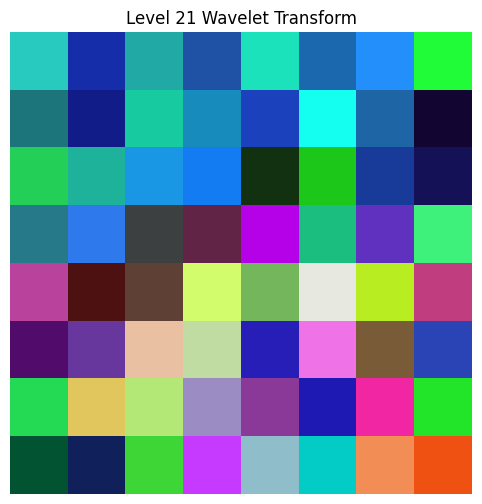

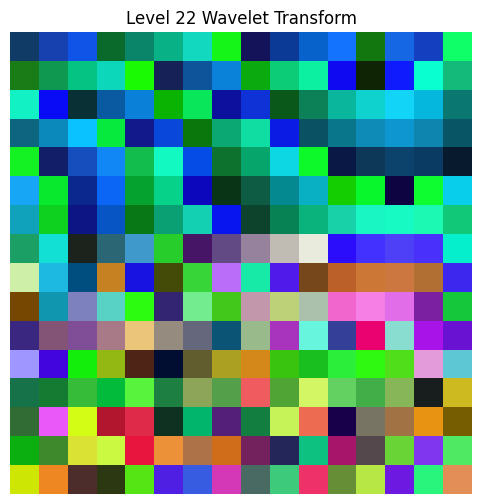

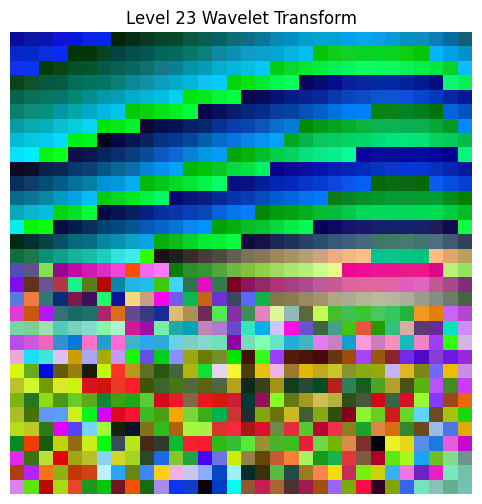

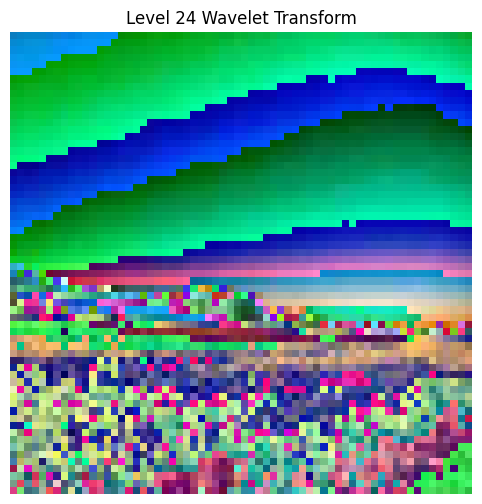

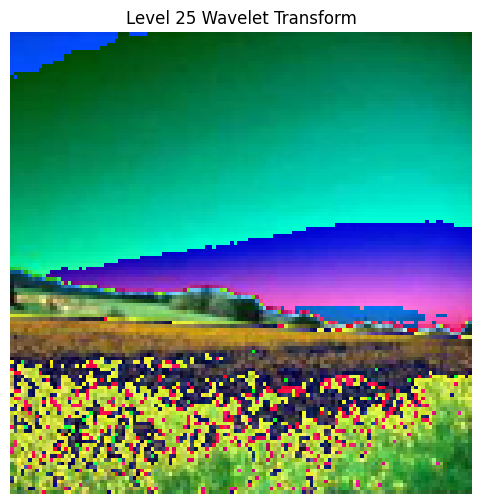

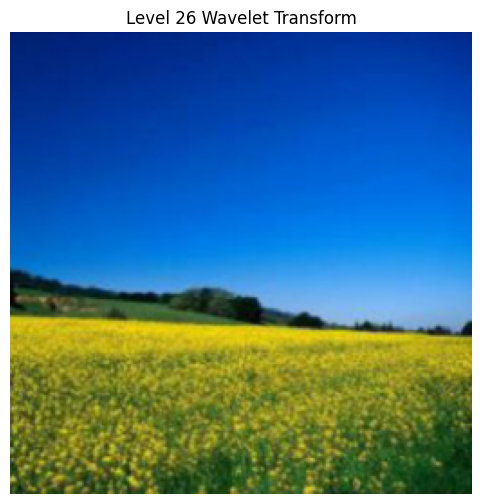

In [ ]:
### import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
image = payload_img

# Convert the image to float32 for wavelet transform
image = np.float32(image)

# Split the image into RGB channels
r, g, b = cv2.split(image)

# Apply wavelet transform to each channel
n_levels = 26  # Change this to the desired number of levels
coeffs_r = pywt.wavedec2(r, 'haar', level=n_levels)
coeffs_g = pywt.wavedec2(g, 'haar', level=n_levels)
coeffs_b = pywt.wavedec2(b, 'haar', level=n_levels)

# Display the coefficients at each level
for i in range(n_levels + 1):
    # Reconstruct each channel using the coefficients
    reconstructed_r = pywt.waverec2(coeffs_r[:i+1], 'haar')
    reconstructed_g = pywt.waverec2(coeffs_g[:i+1], 'haar')
    reconstructed_b = pywt.waverec2(coeffs_b[:i+1], 'haar')

    # Merge the channels back together
    reconstructed_image = cv2.merge((reconstructed_r, reconstructed_g, reconstructed_b))

    # Display the reconstructed image at each level
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(np.uint8(reconstructed_image), cv2.COLOR_BGR2RGB))
    plt.title(f"Level {i} Wavelet Transform")
    plt.axis('off')
    plt.show()
